<a href="https://colab.research.google.com/github/Batfede/Mate-e-Realt-/blob/main/Matematica_e_Realt%C3%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import least_squares
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [ ]:
def rational_function(parameters, x):
  a, b, c, d = parameters
  return (a*x**2 + b*x)/(c*x + d)

Ora creiamo una funzione che approssima l'errore fra il valore atteso e quello voluto (dati 4 punti dati) e che rispetti l'introito complessivo

In [ ]:
total_tax_payers = 42e6
distribution = {"low": 32.5e6, "mid": 7.6e6, "high": 1.9e6}

def N(x):
  if x <= 28000:
    return distribution["low"]/28000
  elif x <= 50000:
    return distribution["mid"]/(50000 - 28000)
  elif x <= 200000:
    return distribution["high"]/(200000-50000)
  else:
    return 0

def total_revenue_function(parameters):
    return quad(lambda x: rational_function(parameters, x) * N(x), 0, 200000)[0]

def total_error_function(parameters, x_input, y_input, target_revenue):
  a, b, c, d = parameters
  # errore nei punti dati
  error_points =  rational_function(parameters, x_input) - y_input
  # errore nell'introito complessivo
  revenue = total_revenue_function(parameters)
  error_revenue = (revenue - target_revenue) / target_revenue

  return np.append(error_points, error_revenue)


In [ ]:
x_input = np.array([0, 28000, 50000, 200000])
y_input = np.array([0, 6400, 14140, 78640])
target_revenue = 63e9

initial_params = np.array([1e-5, 1, 1e-5, 1])

In [ ]:
result = least_squares(total_error_function, initial_params, args=(x_input, y_input, target_revenue))

<ipython-input-4-354005266bb5>:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda x: rational_function(parameters, x) * N(x), 0, 200000)[0]
<ipython-input-4-354005266bb5>:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(lambda x: rational_function(parameters, x) * N(x), 0, 200000)[0]


In [ ]:
a, b, c, d = result.x

print("a:", a, "b:", b, "c:", c, "d:", d)

a: 1.9836913339230267e-05 b: 0.16116784642651738 c: 4.2818267886960074e-05 d: 1.9362205836157114


Ora visualizziamo la funzione

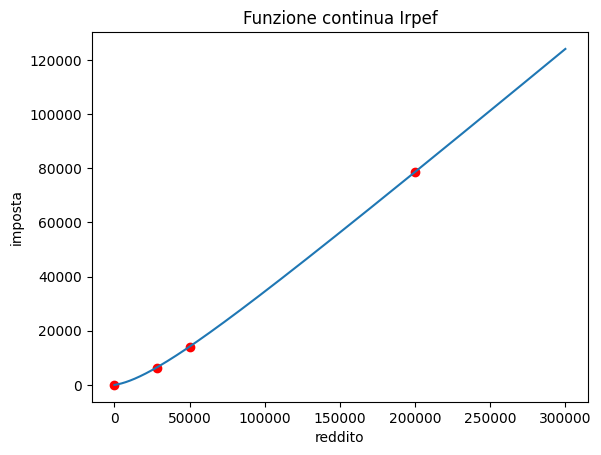

In [ ]:
x_values = np.arange(0.0, max(x_input) + 100000, 0.01)

plt.plot(x_values, rational_function(result.x, x_values))
plt.scatter(x_input, y_input, color = "red")
plt.xlabel("reddito")
plt.ylabel("imposta")
plt.title("Funzione continua Irpef")

plt.show()
